From https://github.com/pyotr777/synthetic_move/blob/8d43c66b5f66ec722bbe0ab2068c3382fabc77b7/pytables%20tests.ipynb

# Test writing, reading and modifing data with pytables

In [1]:
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import tables

### Plot for testing data

Plot some random data

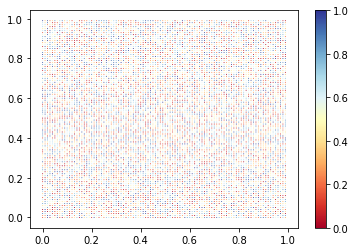

In [2]:
import math
from __future__ import division

def plot_data(data):
    
    s = 1
    cm = plt.cm.get_cmap('RdYlBu')
    
    x = []
    y = []
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            y.append(i/data.shape[0])
            x.append(j/data.shape[1])
    p = plt.scatter(x, y,
                    cmap= cm,
                    c = data, 
                    vmin=0, vmax=1,
                    linewidths = 0,
                    s = s, alpha = 1)

    plt.colorbar(p)
    
dim=100
plt.figure()
test_data=np.random.rand(dim,dim)
plot_data(test_data)
plt.show()

## Write

Use the top-level open_file() function to create a PyTables file:

In [4]:
import time, sys

# Store ones-matrix of rank 2 with given shape and given file path.
# Shape must be a list of 2 ints.
def write_tables(path, data):
    try:
        print("Store data of shape ", data.shape, " in ", path)

        f = tables.open_file(path, 'w')    
        root = f.root
        shape = data.shape
        shape1=(0, shape[1])
        atom = tables.Float16Atom()
        filters = tables.Filters(complevel=5, complib='blosc')
        x = f.create_earray(root,'x', atom, filters = filters,
                            shape = shape1, expectedrows = shape[0])
        start = time.clock()
        if shape[0] > 1000:
            step=1000
        else:
            step=shape[0]-1
        for i in range(0, shape[0], step):
            print(i, step)
            block = data[i:step,:]
            x.append(block)
        end = time.clock()
        print("Execution time: ", end-start)
        f.close()
        return True
    except:
        import traceback
        print("Closing " + path)
        print("Unexpected error:", sys.exc_info()[0])
        traceback.print_exc()
        f.close()
        return False

## Read

In [5]:
def read_tables_all(path):
    f = tables.open_file(path, mode='r')
    x = f.root.x[:,:]
    f.close()
    return x

In [6]:
# Read lines form i1 to i2
def read_tables(path,i1,i2):
    f = tables.open_file(path, mode='r')
    x = f.root.x[i1:i2,:]
    f.close()
    return x

In [7]:
def travers_hdf5file(path):
    try:
        f = tables.open_file(path, "a")
        print(f)
        for node in f:
            print(node)
        f.close()
        return True
    except:
        import traceback
        print("Closing " + path)
        print("Unexpected error:", sys.exc_info()[0])
        traceback.print_exc()
        f.close()
        return False

Ones:


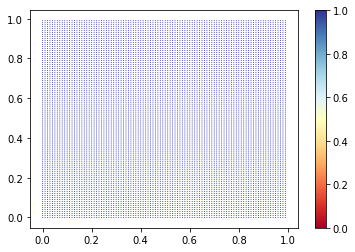

In [12]:
# Test write and read
path = "test.hdf"
ones = np.ones((dim,dim))
print("Ones:")
plt.figure()
plot_data(ones)
plt.show()

In [13]:
write_tables(path, ones)

Store data of shape  (100, 100)  in  test.hdf
0 99
99 99
Execution time:  0.0005112863188969641


True

In [14]:
x = read_tables_all(path)

Read:


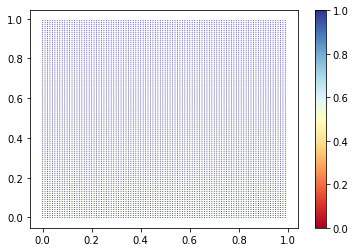

In [15]:
print("Read:")
plt.figure()
plot_data(x)
plt.show()

## Modify

In [9]:
# Replace data in file path from line i1 with "data"
def modify_tables(path,i1,data):
    try:
        print("Modify data in ", path, " starting with line ", i1)
        f = tables.open_file(path, mode='a')
        print(f)
        x = f.root.x
        print(x.shape)
        i2 = i1 + data.shape[0]
        if x.shape[0] < i2:
            print("Data has only ", x.shape[0], " lines. Asked to use up to ", i2)
            print("Closing ", path)
            f.close()
            return False
        x[i1:i2,:] = data
        print("Modified data in lines ", i1, " - ", i2)
        f.close()
        return True
    except:
        import traceback
        print("Closing " + path)
        print("Unexpected error:", sys.exc_info()[0])
        traceback.print_exc()
        f.close()
        return False        

In [16]:
print(path)
test_data=np.random.rand(25,dim)
modify_tables(path,40,test_data)

test.hdf
Modify data in  test.hdf  starting with line  40
test.hdf (File) ''
Last modif.: 'Tue Dec  5 09:05:16 2017'
Object Tree: 
/ (RootGroup) ''
/x (EArray(99, 100), shuffle, blosc(5)) ''

(99, 100)
Modified data in lines  40  -  65


True

In [17]:
travers_hdf5file(path)

test.hdf (File) ''
Last modif.: 'Tue Dec  5 09:05:56 2017'
Object Tree: 
/ (RootGroup) ''
/x (EArray(99, 100), shuffle, blosc(5)) ''

/ (RootGroup) ''
/x (EArray(99, 100), shuffle, blosc(5)) ''


True

Read:


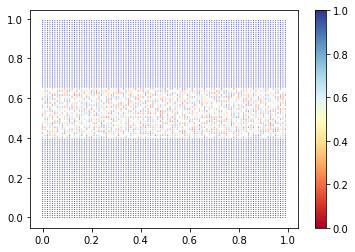

In [18]:
x = read_tables_all(path)
print("Read:")
plt.figure()
plot_data(x)
plt.show()

In [19]:
ls

 Volume in drive C is OS
 Volume Serial Number is 84A8-8662

 Directory of C:\Users\RCole\Documents\Bitbucket\robin_cole\Python_Packages_Examples\Pytables

05/12/2017  09:05    <DIR>          .
05/12/2017  09:05    <DIR>          ..
05/12/2017  08:53    <DIR>          .ipynb_checkpoints
05/12/2017  09:01             4,330 Pytables RC 5-12-2017.ipynb
05/12/2017  09:05           491,967 pytables tests 5-12-2017.ipynb
05/12/2017  09:06             9,836 test.hdf
               3 File(s)        506,133 bytes
               3 Dir(s)  240,028,004,352 bytes free
